# Análise de Acidentes de Trânsito no Brasil (2025)

Este projeto faz parte da disciplina **Introdução à Ciência de Dados** e tem como objetivo analisar dados de acidentes de trânsito ocorridos no Brasil [ao decorrer do tempo]. Utilizando técnicas de análise exploratória de dados, visualização e estatística, buscamos identificar padrões, causas e fatores relacionados aos acidentes, além de propor insights para prevenção e melhoria da segurança viária.

## Objetivos do Projeto

- Explorar e compreender o conjunto de dados de acidentes de trânsito.
- Identificar as principais causas e tipos de acidentes.
- Analisar a distribuição dos acidentes por estado, município, dia da semana e horário.
- Avaliar o impacto dos acidentes em termos de vítimas (mortos, feridos leves e graves).
- Visualizar o evoluçao/regreção dos acidentes no país no decorrer dos anos.
- Visualizar os dados para facilitar a interpretação e comunicação dos resultados.

## Fonte dos Dados

Os dados utilizados neste projeto foram extraídos do sistema DATATRAN, dados disponibilizados pela PRF contendo informações detalhadas sobre cada ocorrência, como local, horário, condições meteorológicas, tipo de pista, número de vítimas, entre outros.

---


# Importações:

---

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


# Informações Pincipais da Tabela:
---

In [76]:
tabela2025 = pd.read_csv('datatran2025.csv', sep=';')
tabela2024 = pd.read_csv('datatran2024.csv', sep=';')
tabela2023 = pd.read_csv('datatran2023.csv', sep=';')
tabela2022 = pd.read_csv('datatran2022.csv', sep=';')
tabela2021 = pd.read_csv('datatran2021.csv', sep=';')
tabela2020 = pd.read_csv('datatran2020.csv', sep=';')

tabela2020_2025 = pd.concat([tabela2020, tabela2021, tabela2022, tabela2023, tabela2024, tabela2025], ignore_index=True)


In [77]:
tabela2025

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,652493.0,2025-01-01,quarta-feira,06:20:00,SP,116,225,GUARULHOS,Reação tardia ou ineficiente do condutor,Tombamento,...,0,0,1,1,2,"-23,48586772","-46,54075317",SPRF-SP,DEL01-SP,UOP01-DEL01-SP
1,652519.0,2025-01-01,quarta-feira,07:50:00,CE,116,"546,2",PENAFORTE,Pista esburacada,Colisão frontal,...,0,1,4,1,6,"-7,812288","-39,08333306",SPRF-CE,DEL05-CE,UOP03-DEL05-CE
2,652522.0,2025-01-01,quarta-feira,08:45:00,PR,369,"88,2",CORNELIO PROCOPIO,Reação tardia ou ineficiente do condutor,Colisão traseira,...,0,2,0,3,2,"-23,182565","-50,637228",SPRF-PR,DEL07-PR,UOP05-DEL07-PR
3,652544.0,2025-01-01,quarta-feira,11:00:00,PR,116,74,CAMPINA GRANDE DO SUL,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,0,4,0,1,2,"-25,36517687","-49,04223028",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
4,652549.0,2025-01-01,quarta-feira,09:30:00,MG,251,471,FRANCISCO SA,Velocidade Incompatível,Colisão frontal,...,1,1,2,2,4,"-16,46801304","-43,43121303",SPRF-MG,DEL12-MG,UOP01-DEL12-MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34700,705679.0,2025-05-23,sexta-feira,17:07:00,BA,324,600,SIMOES FILHO,Ausência de reação do condutor,Queda de ocupante de veículo,...,0,0,0,1,1,"-12,77075662","-38,42161417",SPRF-BA,DEL01-BA,UOP01-DEL01-BA
34701,705735.0,2025-06-29,domingo,08:30:00,SP,381,59,MAIRIPORA,Manobra de mudança de faixa,Colisão lateral mesmo sentido,...,0,1,0,1,2,"-23,28048922","-46,58644867",SPRF-SP,DEL03-SP,UOP01-DEL03-SP
34702,705751.0,2025-06-05,quinta-feira,18:25:00,RJ,465,10,SEROPEDICA,Demais falhas mecânicas ou elétricas,Colisão lateral mesmo sentido,...,0,1,0,1,2,"-22,8065671","-43,6390686",SPRF-RJ,DEL06-RJ,UOP02-DEL06-RJ
34703,705809.0,2025-05-01,quinta-feira,19:50:00,SE,101,"98,6",SAO CRISTOVAO,Velocidade Incompatível,Colisão traseira,...,0,0,1,0,2,"-10,930556","-37,185833",SPRF-SE,DEL02-SE,UOP01-DEL02-SE


In [42]:
print(tabela2025.info())

tabela2025 = tabela2025.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34705 entries, 0 to 34704
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      34705 non-null  float64
 1   data_inversa            34705 non-null  object 
 2   dia_semana              34705 non-null  object 
 3   horario                 34705 non-null  object 
 4   uf                      34705 non-null  object 
 5   br                      34705 non-null  int64  
 6   km                      34705 non-null  object 
 7   municipio               34705 non-null  object 
 8   causa_acidente          34705 non-null  object 
 9   tipo_acidente           34705 non-null  object 
 10  classificacao_acidente  34704 non-null  object 
 11  fase_dia                34705 non-null  object 
 12  sentido_via             34705 non-null  object 
 13  condicao_metereologica  34705 non-null  object 
 14  tipo_pista              34705 non-null

In [43]:
print(tabela2025['causa_acidente'].value_counts())


causa_acidente
Ausência de reação do condutor                               5319
Reação tardia ou ineficiente do condutor                     5147
Acessar a via sem observar a presença dos outros veículos    3342
Condutor deixou de manter distância do veículo da frente     2111
Velocidade Incompatível                                      1997
                                                             ... 
Modificação proibida                                            4
Semáforo com defeito                                            4
Redutor de velocidade em desacordo                              4
Sistema de drenagem ineficiente                                 2
Sinalização encoberta                                           1
Name: count, Length: 69, dtype: int64


# Analise Temporal
-----

In [62]:
# Convertendo a data inversa pra datetime
tabela2025.loc[:,'data_inversa'] = pd.to_datetime(tabela2025['data_inversa'],errors='coerce')

meses = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho',
         7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

# Criando colunas derivadas
tabela2025.loc[:,'ano'] = tabela2025['data_inversa'].dt.year
tabela2025.loc[:,'mes'] = tabela2025['data_inversa'].dt.month
tabela2025.loc[:,'hora'] = pd.to_datetime(tabela2025['horario'], format='%H:%M:%S', errors='coerce').dt.hour

tabela2025['mes'] = tabela2025['mes'].map(meses)

display(tabela2025.head())

C:\Users\henri\AppData\Local\Temp\ipykernel_38880\1612539448.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela.loc[:,'hora'] = pd.to_datetime(tabela['horario'], format='%H:%M:%S', errors='coerce').dt.hour
C:\Users\henri\AppData\Local\Temp\ipykernel_38880\1612539448.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela['mes'] = tabela['mes'].map(meses)


,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos,veiculos,latitude,longitude,regional,delegacia,uop,ano,mes,hora
0,652493.0,2025-01-01,quarta-feira,06:20:00,SP,116,225,GUARULHOS,Reação tardia ou ineficiente do condutor,Tombamento,...,1,2,"-23,48586772","-46,54075317",SPRF-SP,DEL01-SP,UOP01-DEL01-SP,2025,Janeiro,6
1,652519.0,2025-01-01,quarta-feira,07:50:00,CE,116,"546,2",PENAFORTE,Pista esburacada,Colisão frontal,...,1,6,"-7,812288","-39,08333306",SPRF-CE,DEL05-CE,UOP03-DEL05-CE,2025,Janeiro,7
2,652522.0,2025-01-01,quarta-feira,08:45:00,PR,369,"88,2",CORNELIO PROCOPIO,Reação tardia ou ineficiente do condutor,Colisão traseira,...,3,2,"-23,182565","-50,637228",SPRF-PR,DEL07-PR,UOP05-DEL07-PR,2025,Janeiro,8
3,652544.0,2025-01-01,quarta-feira,11:00:00,PR,116,74,CAMPINA GRANDE DO SUL,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,1,2,"-25,36517687","-49,04223028",SPRF-PR,DEL01-PR,UOP02-DEL01-PR,2025,Janeiro,11
4,652549.0,2025-01-01,quarta-feira,09:30:00,MG,251,471,FRANCISCO SA,Velocidade Incompatível,Colisão frontal,...,2,4,"-16,46801304","-43,43121303",SPRF-MG,DEL12-MG,UOP01-DEL12-MG,2025,Janeiro,9


In [48]:
tabela2025['horario'].unique()

array(['06:20:00', '07:50:00', '08:45:00', ..., '06:48:00', '02:23:00',
       '16:21:00'], dtype=object)

In [55]:
# Acidentes por dia da semana
acidentes_por_dia = tabela2025['dia_semana'].value_counts()

print('Acidentes por dia:')
print(acidentes_por_dia)

# Acidentes por hora
acidentes_por_hora = tabela2025['horario'].value_counts().sort_index()

print('\nAcidentes por hora:')
print(acidentes_por_hora)

# Acidentes por mês
acidentes_por_mes = tabela2025.groupby('mes').size()

print('\nAcidentes por mês:')
print(acidentes_por_mes)


Acidentes por dia:
dia_semana
domingo          5478
sábado           5420
sexta-feira      5308
segunda-feira    5061
quarta-feira     4660
quinta-feira     4585
terça-feira      4179
Name: count, dtype: int64

Acidentes por hora:
horario
00:00:00    59
00:01:00    17
00:02:00     4
00:03:00     6
00:04:00     3
            ..
23:55:00    22
23:56:00     2
23:57:00     5
23:58:00     1
23:59:00     3
Name: count, Length: 1299, dtype: int64

Acidentes por mês:
mes
Abril        5776
Fevereiro    5280
Janeiro      5523
Junho        6082
Maio         6078
Março        5952
dtype: int64


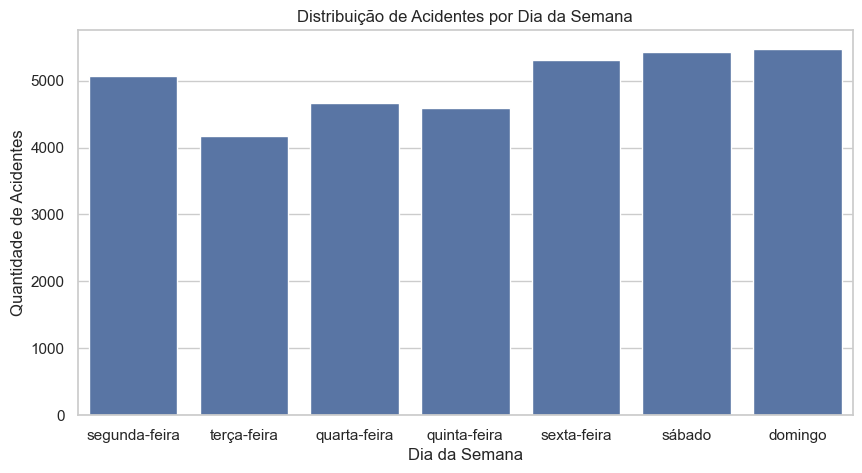

In [67]:
sns.set_theme(style="whitegrid")


# Acidentes por Dia da Semana
plt.figure(figsize=(10,5))
sns.countplot(data=tabela2025, x='dia_semana', order=['segunda-feira','terça-feira','quarta-feira','quinta-feira','sexta-feira','sábado','domingo'])
plt.title('Distribuição de Acidentes por Dia da Semana')
plt.ylabel('Quantidade de Acidentes')
plt.xlabel('Dia da Semana')
plt.show()

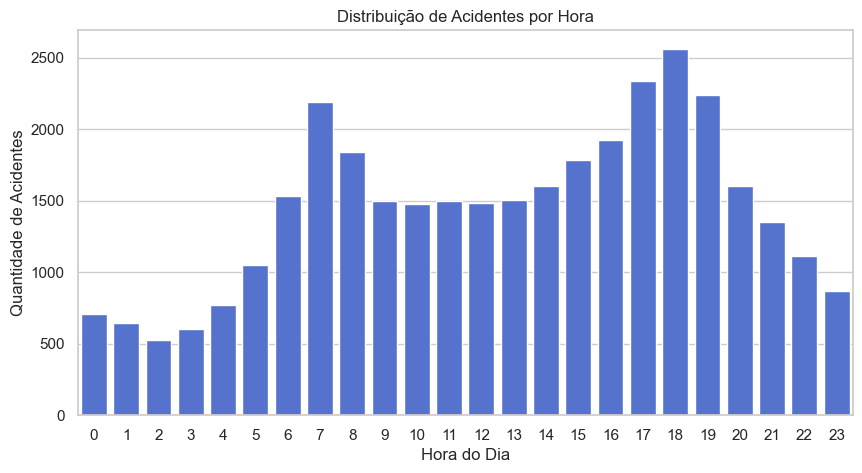

In [66]:
# Acidentes por hora do dia
plt.figure(figsize=(10,5))
sns.countplot(data=tabela2025, x='hora', color='royalblue')
plt.title('Distribuição de Acidentes por Hora')
plt.ylabel('Quantidade de Acidentes')
plt.xlabel('Hora do Dia')
plt.show()

In [71]:
# Evolução ao longo dos anos (linha)
evolucao = tabela2020_2025.groupby('ano').size().reset_index(name='acidentes')
plt.figure(figsize=(10,5))
sns.lineplot(data=evolucao, x='ano', y='acidentes', marker='o')
plt.title('Evolução Anual de Acidentes')
plt.ylabel('Quantidade')
plt.xlabel('Ano')
plt.show()

KeyError: 'ano'

## Primeira Conclusão da Análise Temporal
Apesar de percebermos que os dados estão bem destribuidos, nos finais de semana à noite são onde ocorrem a maioria dos acidentes

---

In [ ]:
alcool = tabela2025[tabela2025['causa_acidente'] == 'Ingestão de álcool pelo condutor']
#display(alcool)

print(f"Totais de casos com alcool: {alcool.shape[0]} casos")

# Analise Geografica
---

In [ ]:
# Locais de Principais Ocorrências de Acidentes
# Acidentes por UF (estado)
print(tabela2025['uf'].value_counts())

# Acidentes por município
print(tabela2025['municipio'].value_counts())

# Gravidade e Vítimas 
---

In [ ]:
# Classificação dos acidentes
print(tabela2025['classificacao_acidente'].value_counts())


# Mortos e feridos leves por tipo de acidente
resultado = tabela2025.groupby('tipo_acidente')[['mortos', 'feridos_leves']].sum()
print(resultado)


In [ ]:
# Total de mortos e feridos em acidentes com álcool
print(tabela2025['mortos'].value_counts())
print(f'Total: {0}',tabela2025['mortos'].value_counts().sum())